In [23]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('./student-por.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
df.shape

(649, 33)

<Axes: >

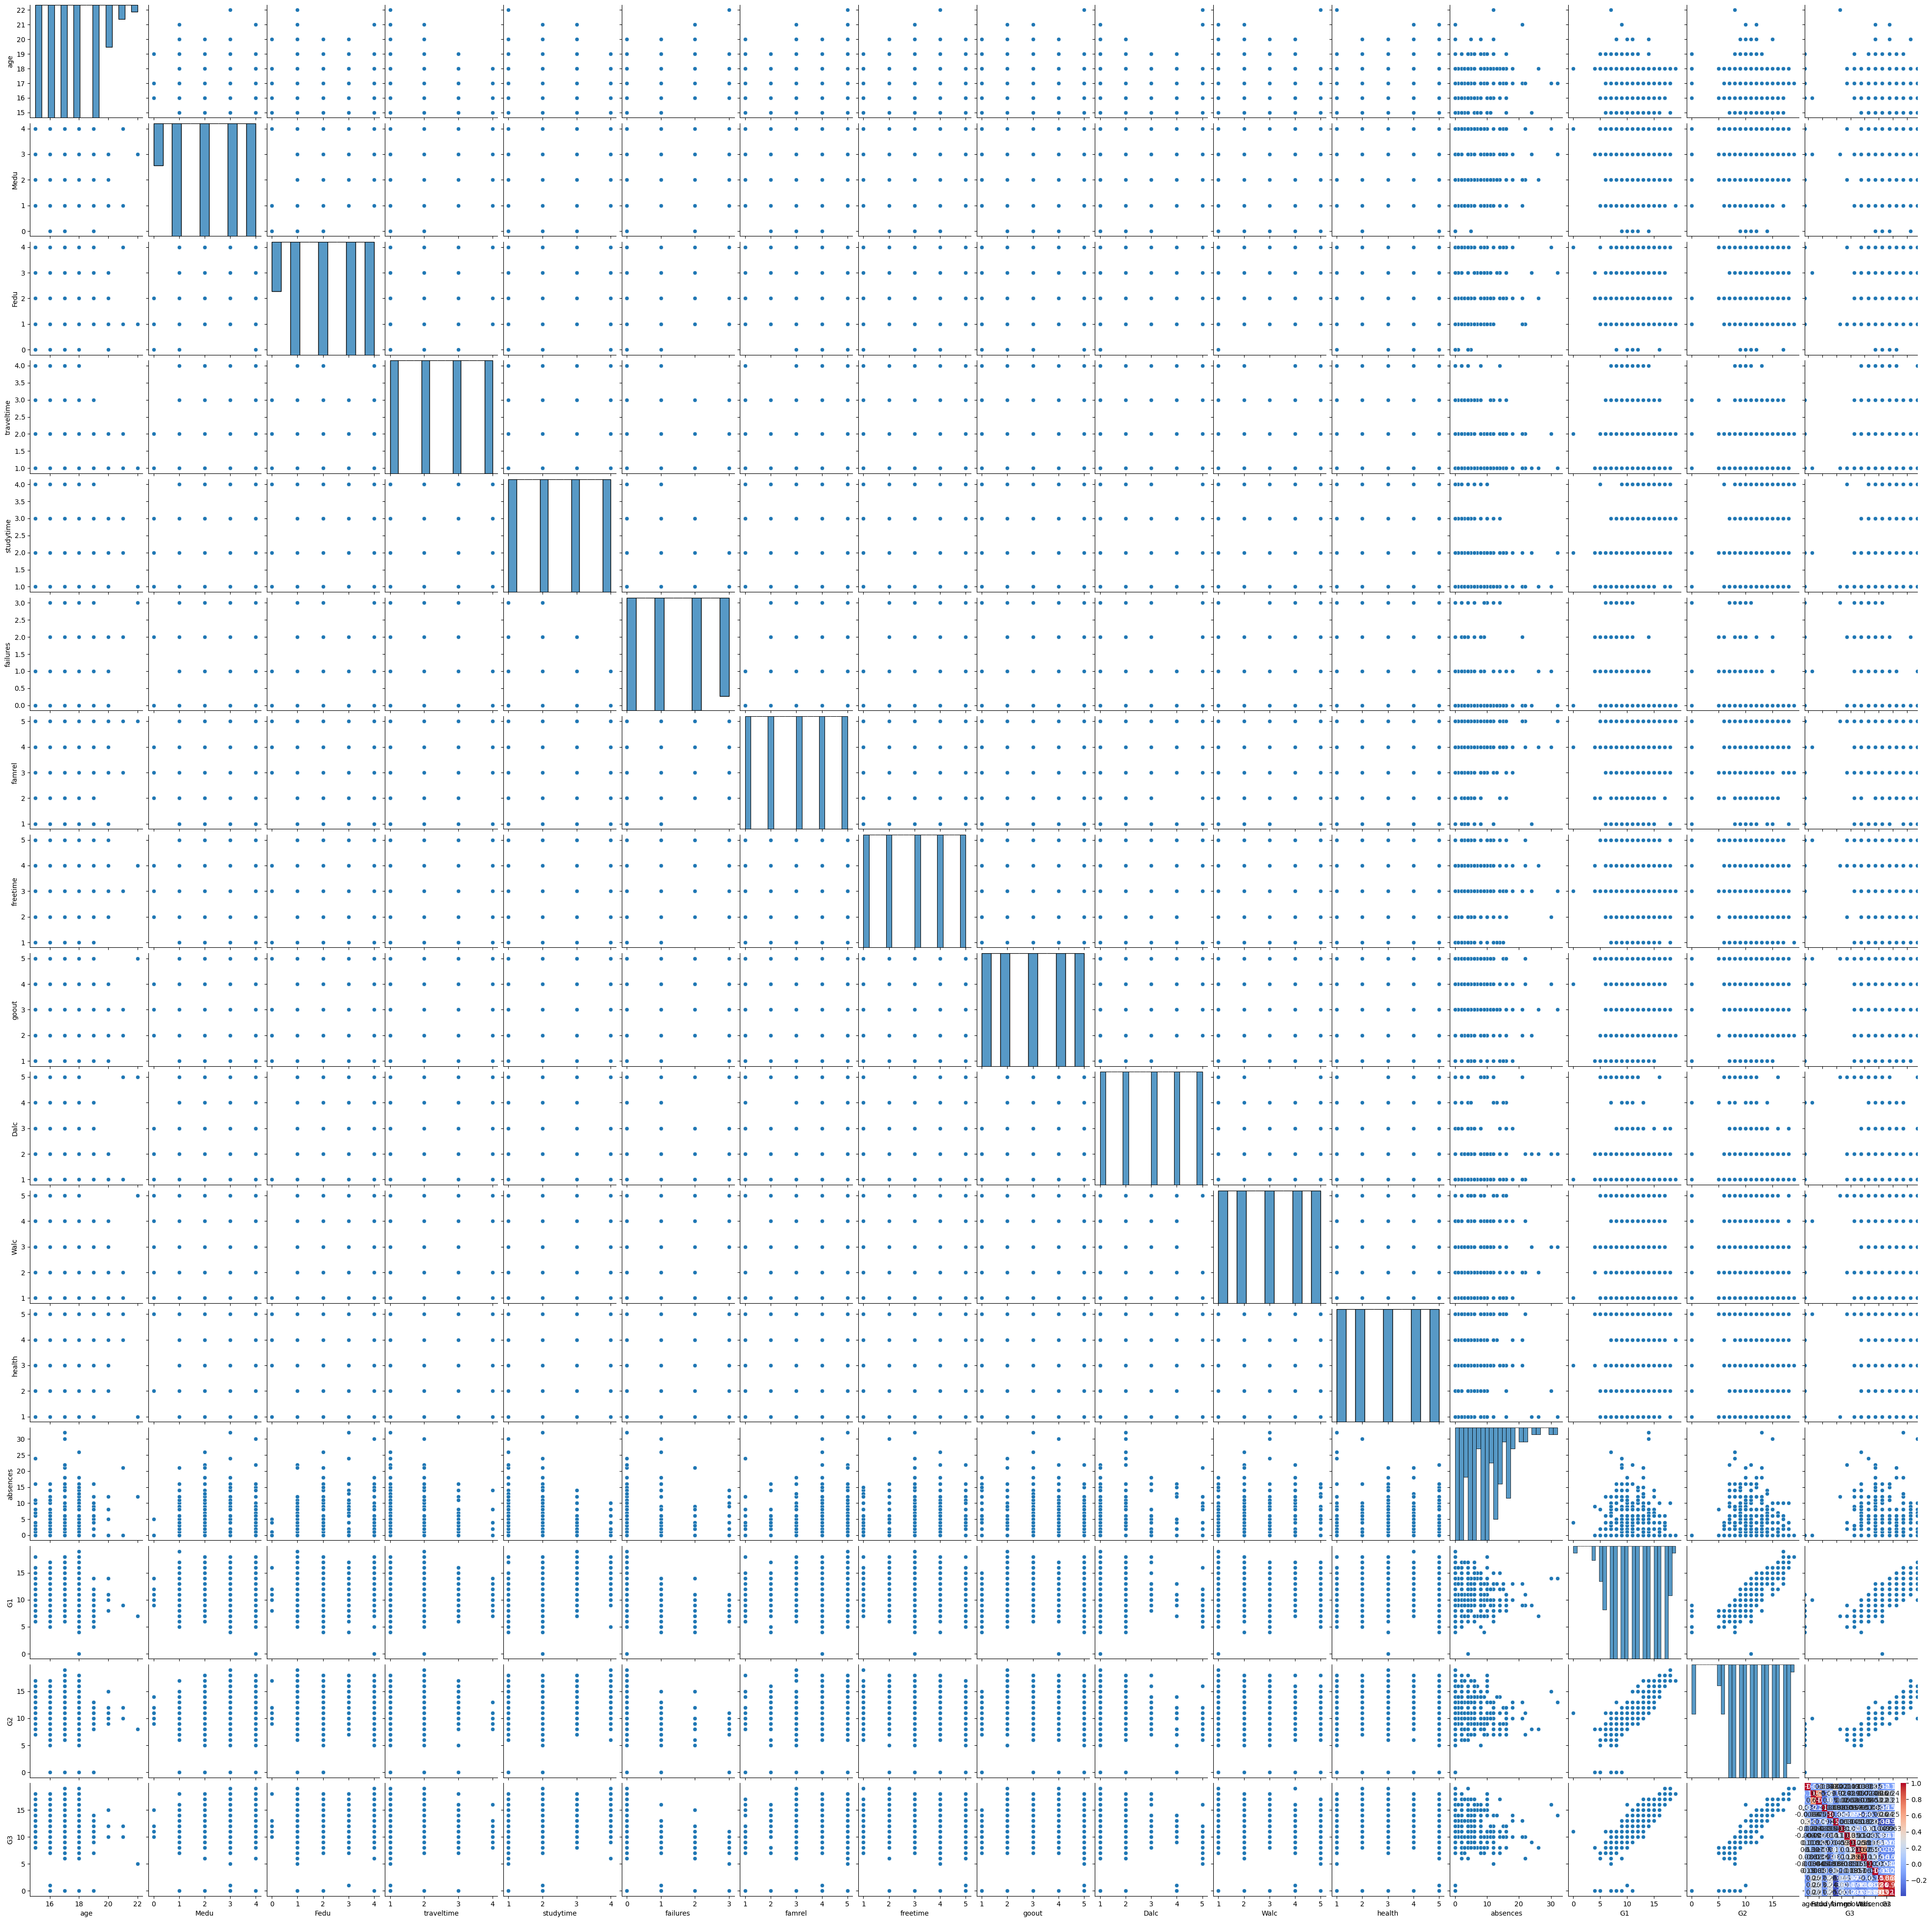

In [7]:
sns.pairplot(df)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [8]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [11]:
y = df['G3']
y
X = df.drop('G3', axis=1)
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,11,13


In [14]:
categorical_cols = X.select_dtypes(include='object').columns
categorical_cols

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [16]:
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,0,4,3,2,2,...,True,False,True,False,False,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,False,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,True,False,False,False,False,True,False,True,True,False
645,18,3,1,1,2,0,4,3,4,1,...,True,False,False,True,False,False,True,True,True,False
646,18,1,1,2,2,0,1,1,1,1,...,True,False,False,False,False,True,True,True,False,False
647,17,3,1,2,1,0,2,4,5,3,...,True,False,False,False,False,False,False,True,True,False


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)
y_pred

array([18.40265613, 11.82720849, 18.56288575, 10.80969554, 11.74323992,
       16.52050538, 17.68642688,  9.20547185, 10.99263829, 10.52990179,
       18.68507485, 12.01170944, 12.51636949,  9.25637135, 10.92001471,
       13.89458333, 11.70284959,  7.75525634, 15.58827334, 14.91646892,
       15.48017743, 13.6711844 , 14.51763488, 12.14228197, 14.73663429,
       12.89956801,  8.386953  , 11.70486551, 11.30482308, 15.39946248,
       15.91856938, 13.007757  ,  7.94478881,  6.55967433, 17.82710293,
       15.76901234, 14.0460542 , 15.54431689, 13.26315587, 11.43204987,
       13.88933129, 11.05736646,  8.62073014, 11.85157458, 13.27989252,
       13.13368834, 17.89357593, 11.39508466, 12.06570598, 11.36425844,
       11.00499054, 11.16234464, 14.32597736,  9.8592132 , 10.79193041,
       18.01161782,  9.10909354, 10.35558102, 11.4316307 , 10.04193231,
        8.21272376, 11.30013557, 16.13851443, 12.36903381, 15.51853105,
       16.17553342,  9.9042642 ,  7.94076538,  9.50371636,  9.57

In [26]:
res = pd.DataFrame({
    'actual' : y_test,
    'predicted': y_pred
})
res

,actual,predicted
636,19,18.402656
220,12,11.827208
594,18,18.562886
429,11,10.809696
72,11,11.743240
...,...,...
514,7,7.054478
374,17,18.585425
444,11,9.411084
244,12,13.207654
